## Environment Setup

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# define path
path = '/Users/Cel/Documents/Data Analytics/6. Maine Fisheries Landings'

In [3]:
# import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'landings_clean.csv'), index_col = False)

## Correlations

In [4]:
df.columns

Index(['Unnamed: 0', 'year', 'species', 'port', 'county', 'weight_type',
       'weight', 'value', 'number_harvesters'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
sub = df[['weight','value','number_harvesters']]

In [7]:
sub.corr()

,weight,value,number_harvesters
weight,1.000000,0.579381,0.212000
value,0.579381,1.000000,0.487541
number_harvesters,0.212000,0.487541,1.000000


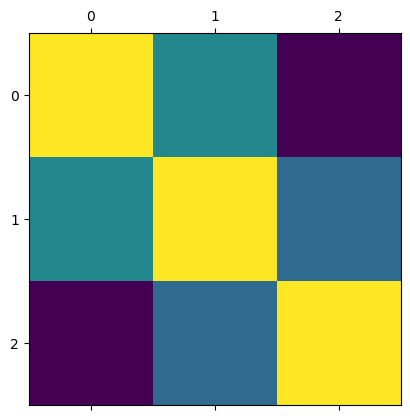

In [8]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

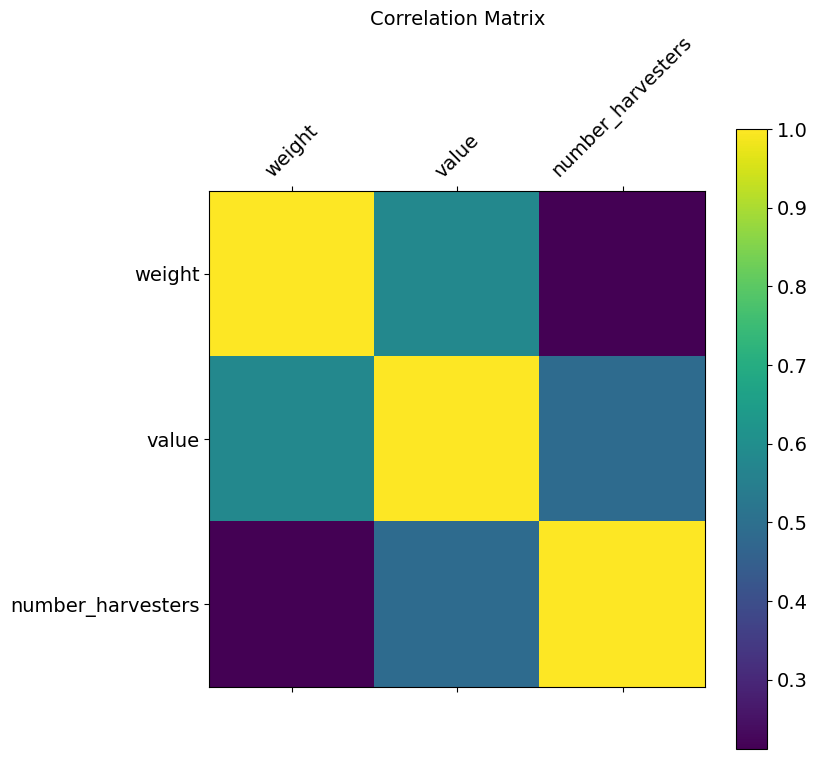

In [9]:
# add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [10]:
# save figure
f.figure.savefig(os.path.join(path, '04 Analysis', 'correlation matrix.png'))

Unfortunately there were only 3 quantitative variables in the dataset so there isn't much to infer, but there are some relationships of note. It looks like weight is positively correlated with values (the heavier the catch, the more it will be worth). The r-value of this relationship is .58.

## Scatterplot

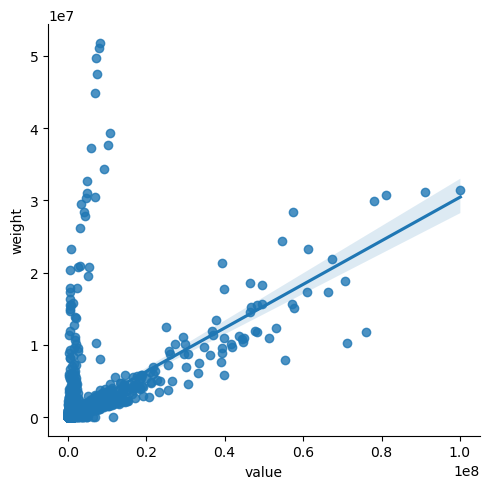

In [11]:
# create a scatterplot for weight and value in seaborn
sns.lmplot(x = 'value', y = 'weight', data = sub)

The scatterplot might look like this because of all the different species which likely have different values (ie bloodworms vs lobster!)

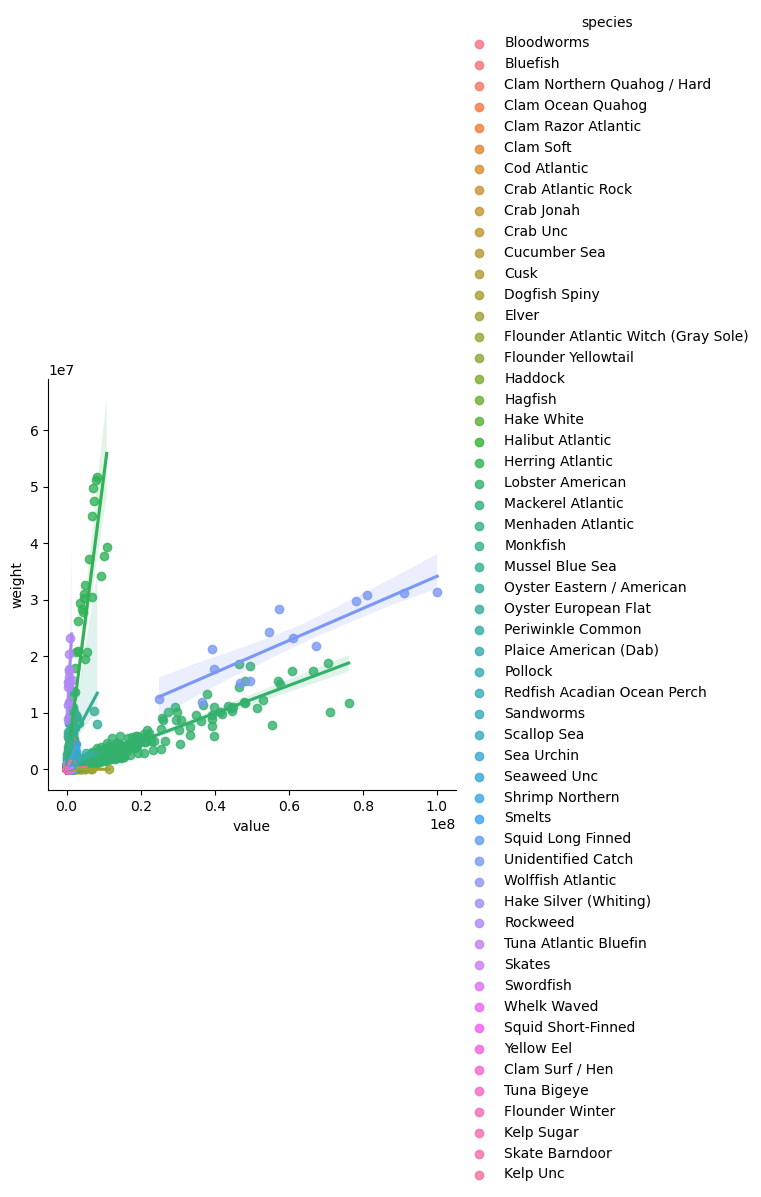

In [12]:
# create a scatterplot for weight and value in seaborn using whole dataset, with color to indicate species
sns.lmplot(x = 'value', y = 'weight', data = df, hue='species')

Huge variation by species! Definitely important to factor in species when comparing value to weight. 

## Pair plots

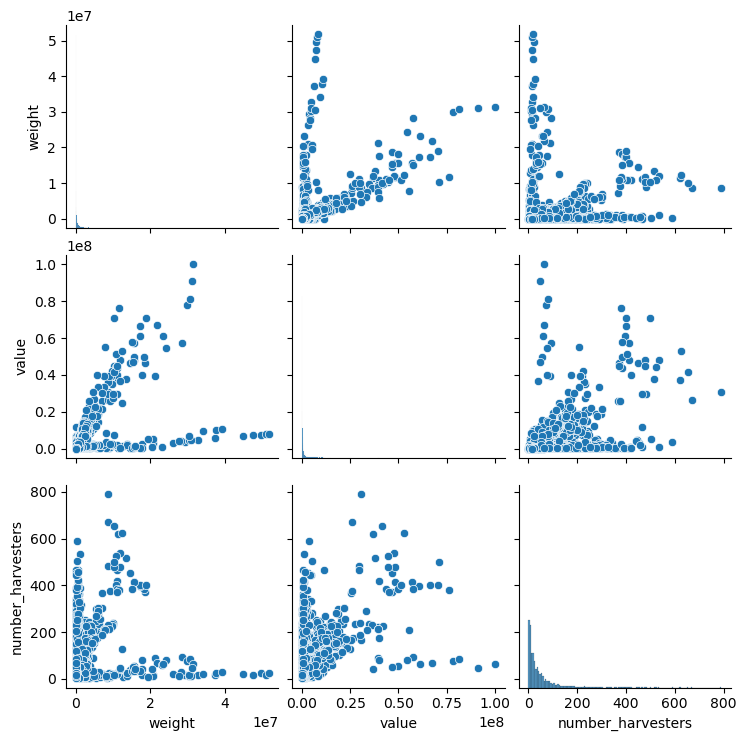

In [13]:
# Keep only the variables you want to use in the pair plot

g = sns.pairplot(sub)

I would definitely like to explore the relationship between value and weight more, and the intricacies of why some species are so much more valuable than others. In terms of the distribution of variables, they are all left-tailed, meaning that the largest frequency groups are small (ie, the vast majority of fishing trips landed a small catch, with lesser value, and required fewer harvesters.)

## Categorical 

#### Price per lb by year (all species)

In [18]:
# create a new 'price_per_lb' column
df['price_per_lb'] = df['value']/df['weight']

/Users/Cel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


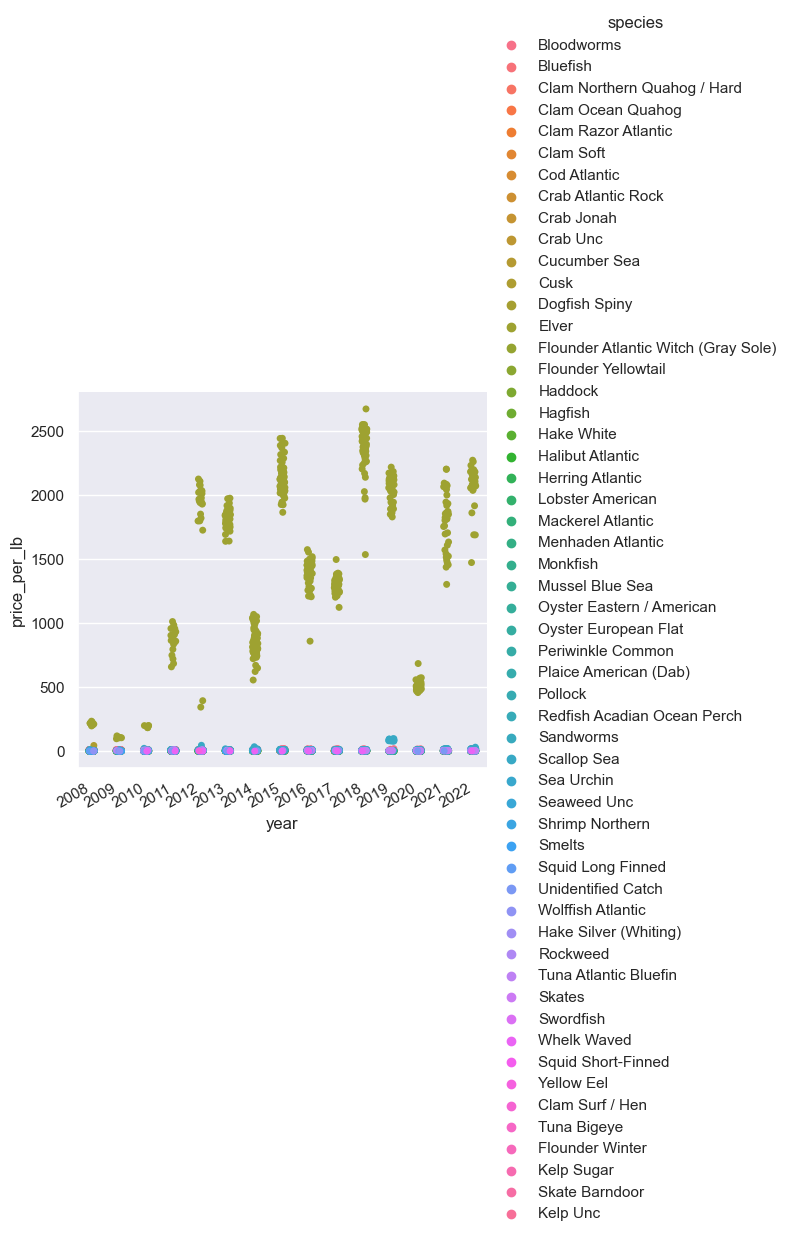

In [58]:
# create categorical plot of prices per lb by year

g = sns.catplot(x="year", y="price_per_lb", hue='species', data=df)
g = plt.gcf()
g.autofmt_xdate()

This plot shows that year after year, elver (baby eels!), is the most valuable fishery in Maine. 

#### Price per lb by year (lobster)

In [46]:
lobster_df = df.loc[df['species'] == 'Lobster American']

In [47]:
lobster_df

,year,species,port,county,weight_type,weight,value,number_harvesters,price_per_lb
182,2008,Lobster American,Addison,Washington,Live Pounds,874072.35,2.811849e+06,80,3.216952
183,2008,Lobster American,Bailey Island,Cumberland,Live Pounds,1300961.05,4.380685e+06,100,3.367269
184,2008,Lobster American,Bar Harbor,Hancock,Live Pounds,749213.48,2.761140e+06,71,3.685385
185,2008,Lobster American,Bass Harbor,Hancock,Live Pounds,860515.00,3.237509e+06,89,3.762292
186,2008,Lobster American,Beals,Washington,Live Pounds,1463538.05,4.777284e+06,173,3.264202
...,...,...,...,...,...,...,...,...,...
4750,2022,Lobster American,Trenton,Hancock,Live Pounds,223031.45,9.568708e+05,17,4.290295
4751,2022,Lobster American,Vinalhaven,Knox,Live Pounds,6960663.70,3.023618e+07,188,4.343864
4752,2022,Lobster American,Wells,York,Live Pounds,24907.00,1.156994e+05,6,4.645256
4753,2022,Lobster American,Winter Harbor,Hancock,Live Pounds,1818154.05,6.541451e+06,57,3.597853


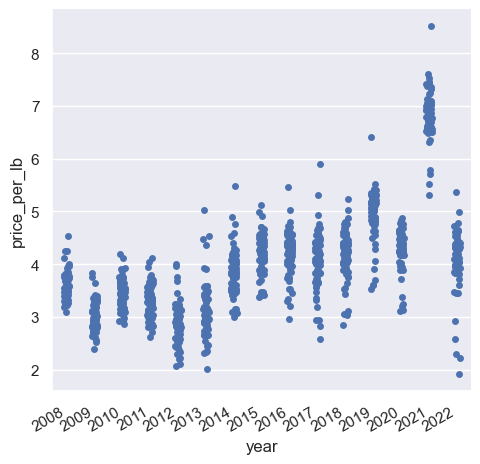

In [57]:
# create categorical plot of lobster prices per lb by year

f = sns.catplot(x="year", y="price_per_lb", data=lobster_df)
f = plt.gcf()
f.autofmt_xdate()

I wanted to look at lobster due to the cultural significance of the fishery, and because I hear so much about price fluctuations over the years. This plot makes that evident. It looks like lobster prices more than doubled in 2021!

## Answers to research questions

#### What is Maine’s most prolific/most valuable fishery?

This is without a doubt the elver fishery, which contradicts my previous assumption that lobster would generate the most value. Initial research confirms that elver can be worth over $2000/lb because of Asian aquaculture demand!

#### What is the most valuable species per lb?


Again, this would be elver. 

## Hypothesis to test

This exercise hasn't helped be in developing a hypothesis, since my questions are more geographically based, and require grouping data rather than exploring categories or relationships between two quantitative variables. 